In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/sentiment analysis/Sentiment_Analysis.csv')
df.head()
df.shape
cols=df.columns.tolist()
print(cols)
df.dtypes
df.describe()
df.info()
df.isnull().sum()

['Review_ID', 'Review_Text', 'Rating', 'Review_Length', 'Sentiment_Score', 'Reviewer_Age', 'Product_Category', 'Gender', 'Review_Helpful_Count', 'Sentiment_Label']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Review_ID             900 non-null    object 
 1   Review_Text           900 non-null    object 
 2   Rating                755 non-null    float64
 3   Review_Length         900 non-null    int64  
 4   Sentiment_Score       900 non-null    float64
 5   Reviewer_Age          824 non-null    float64
 6   Product_Category      900 non-null    object 
 7   Gender                900 non-null    object 
 8   Review_Helpful_Count  848 non-null    float64
 9   Sentiment_Label       900 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 70.4+ KB


,0
Review_ID,0
Review_Text,0
Rating,145
Review_Length,0
Sentiment_Score,0
Reviewer_Age,76
Product_Category,0
Gender,0
Review_Helpful_Count,52
Sentiment_Label,0


In [5]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns

In [6]:
num_columns


Index(['Rating', 'Review_Length', 'Sentiment_Score', 'Reviewer_Age',
       'Review_Helpful_Count'],
      dtype='object')

In [7]:
cat_columns

Index(['Review_ID', 'Review_Text', 'Product_Category', 'Gender',
       'Sentiment_Label'],
      dtype='object')

In [8]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())

In [9]:
df.isnull().sum()


,0
Review_ID,0
Review_Text,0
Rating,0
Review_Length,0
Sentiment_Score,0
Reviewer_Age,0
Product_Category,0
Gender,0
Review_Helpful_Count,0
Sentiment_Label,0


In [12]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Scale numerical features with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])


In [13]:
df.drop(['Review_ID'],inplace = True, axis = 1)

In [14]:
X = df.drop('Sentiment_Label', axis=1)  # -- independent variable
y = df['Sentiment_Label'] # -- dependent variable
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
# Evaluate Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)

Logistic Regression Accuracy: 0.35555555555555557
Logistic Regression Confusion Matrix:
 [[45  4  5]
 [46 13  7]
 [44 10  6]]


In [16]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)

Random Forest Accuracy: 0.3277777777777778
Random Forest Confusion Matrix:
 [[26 18 10]
 [33 17 16]
 [25 19 16]]


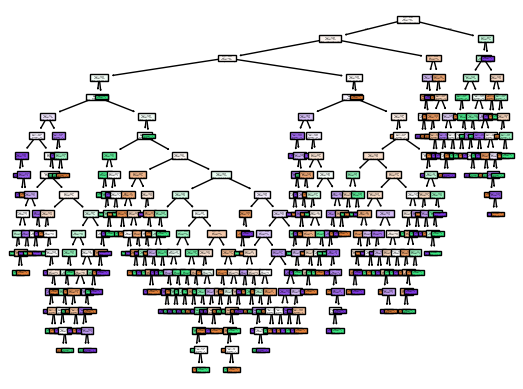

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [18]:
# Select the best model
if logreg_accuracy > rf_accuracy:
    best_model = logreg_model
else:
    best_model = rf_model

# Save the best model as a .pkl file
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
